# Performances: Generalization, Regularization

In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

1) Try to fit the following data with a straight line(y=mx+c). Plot data points along with actual function and your line.

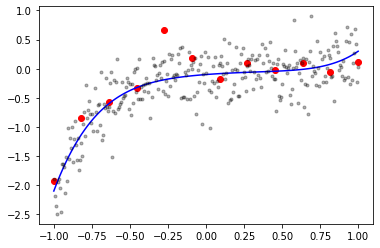

In [55]:
np.random.seed(7777)
ndata = 12
z = [0.6, -0.5, 0.4, -0.3, 0.2, -0.1]
a,b,c,d,e,f = z
noise = 0.3
xs = np.linspace(-1, 1, ndata)
tx = xs
ys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ndata)*noise
actualxs = np.linspace(-1,1,100)
tx = actualxs
actualys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f)

ntest = 300
testxs = np.linspace(-1,1,ntest)
tx = testxs
testys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ntest)*noise

plt.plot(xs, ys,'or')
plt.plot(actualxs, actualys,'b')
plt.plot(testxs, testys, '.k', alpha=0.3)

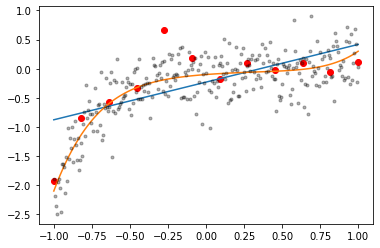

In [56]:
# I'm being nice
def guess(w, x):
    m, c = w
    return m*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0,0]).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)
plt.plot(testxs, testys, '.k', alpha=0.3)

2) What is your in-sample error? $E_{in}$

In [6]:
ein = sum((yy-guess(w,xx))**2 for xx,yy in zip(xs, ys))/len(xs)
print(ein)

0.2304716499317211


3) What is your out-sample error? $E_{out}$

In [8]:
eout = sum((yy-guess(w,xx))**2 for xx,yy in zip(testxs, testys))/len(testxs)
print(eout)

0.19297909635089028


4) Between $E_{in}$ and $E_{out}$
- Which one do we really want to optimize? 
- Which one do we actually optimize when we train our model?

In [ ]:
#eout = what we want
#ein = how we get our model

4.5) Now find $E_{in}$ and $E_{out}$ for the example above.

In [ ]:
#see 2 and 3

5) Now Try fit it with polynomial degree 2 ($y = ax^2 + bx + c)$. Same deal, plot, find $E_{in}$ and $E_{out}$. (Think about a generic function that does this for any number of degree)

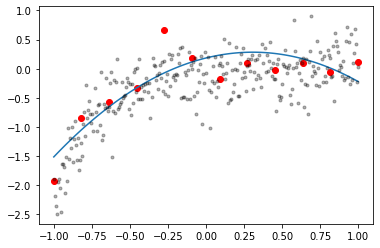

In [10]:
def guess(w,x):
    a,b,c = w
    return a*x**2+b*x+c
def cost(w):
    return sum((yy-guess(w,xx))**2 for xx,yy in zip(xs, ys))/len(xs)
w = minimize(cost,[0,0,0]).x
newx = np.linspace(-1,1,100)
newy = [guess(w,xx) for xx in newx]
plt.plot(xs,ys,'or')
plt.plot(newx,newy)
plt.plot(testxs,testys,'.k',alpha=0.3)

6) Try it with degree 3, 4, 5 ... 11. Can you explain what happen at degree 11?

<span style="color:red;"> DO NOT COPY PASTE codes. Write a function and use for loop </span>

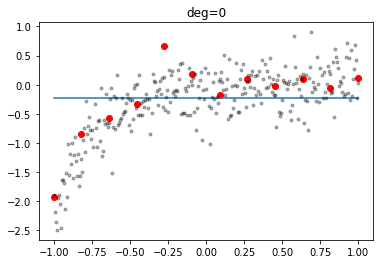

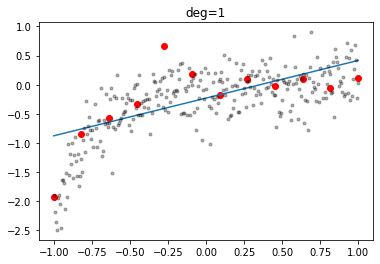

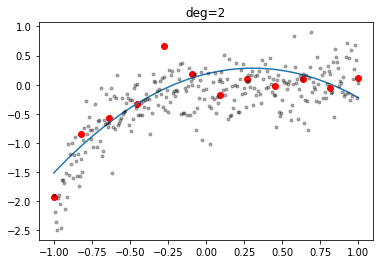

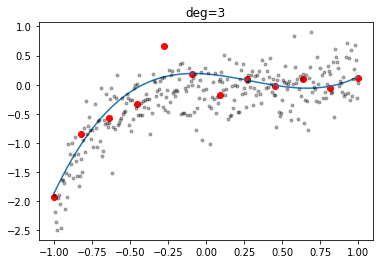

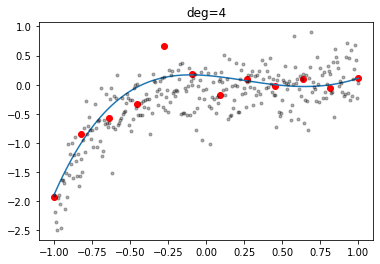

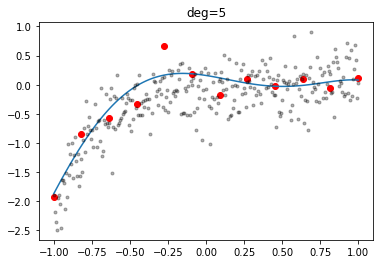

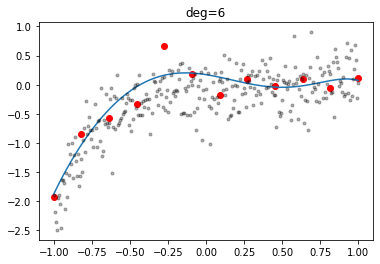

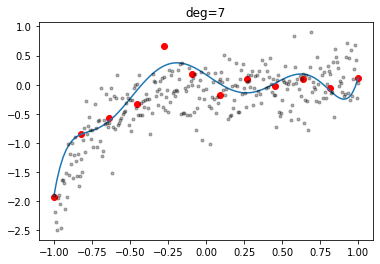

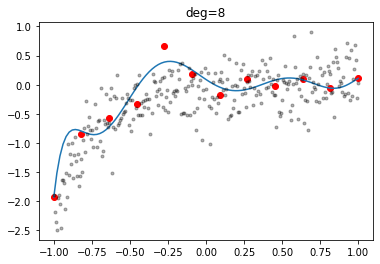

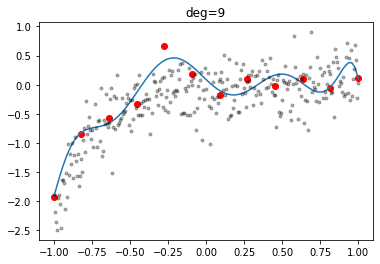

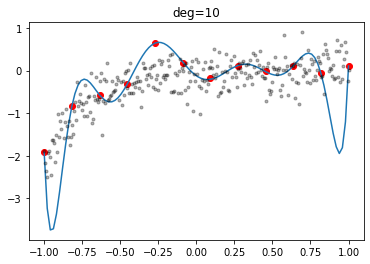

In [24]:
# You may find this useful
def polynomial(ws):
    def poly(x): # w_0 + w_1 * x + ... + w_n * x**n
        return sum(w*x**i for i, w in enumerate(ws))
    return poly

poly = polynomial([1.,2.,3.])
poly(2)
degs=[]
eins=[]
eouts=[]
def guess(w,x):
    return polynomial(w)(x)
def make_cost(xs,ys):
    def cost(w):
        return sum((yy-guess(w,xx))**2 for xx,yy in zip(xs, ys))/len(xs)
    return cost
for i in range(1,12):
    train_error = make_cost(xs,ys) #ein
    test_error = make_cost(testxs,testys) #eout
    w = minimize(train_error,[0.]*i).x
    degs.append(i-1)
    eins.append(train_error(w))
    eouts.append(test_error(w))
    newx = np.linspace(-1,1,100)
    newy = [guess(w,xx) for xx in newx]
    plt.figure()
    plt.title(f'deg={i-1}')
    plt.plot(xs,ys,'or')
    plt.plot(newx,newy)
    plt.plot(testxs,testys,'.k',alpha=0.3)

7) Now plot polynomial degree vs $E_{in}$ and degree vs $E_{out}$

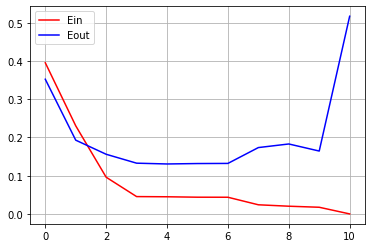

In [26]:
plt.plot(degs,eins,'-r',label='Ein')
plt.plot(degs,eouts,'-b',label='Eout')
plt.legend()
plt.grid()

8) Explain why you see the graph you see in above.

- What's wrong with model that is too simple
- What's wrong with model that is too complex

In [ ]:
#eout = bad
#too simple --> underfitting
#too complex --> overfitting

# Regularization.

1) Print $w$ from those degree 11 polynomial model. What went wrong with overly complex model?

In [ ]:
#the weight is huge

2) How should we penalize the model to prevent overly complex model?

In particular, what is does the penalized cost function looks like?

In [ ]:
#cost(w) = wrongness + lambad * complexity

3) What happen if our penalty is too small? What happend if our penalty is too big?

In [ ]:
#too small get complex model, too big get simple model

4) If $\lambda$ is small do we expect to get complex or simple model? Why?

In [ ]:
#complex since the second term is ignored

5)Try Regularize with $\lambda=1\times10^{-8}$, $\lambda=0.01$ and $\lambda=100$

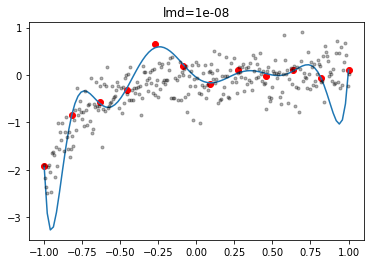

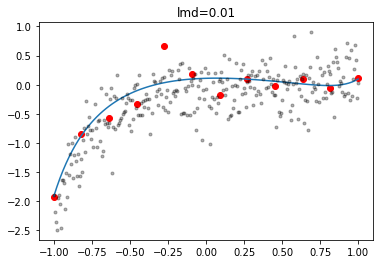

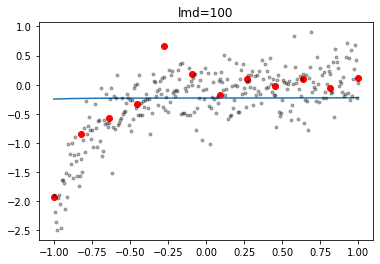

In [27]:
def make_cost(lmd, xs, ys):
    def cost(w):
        wrongness = sum((yy-guess(w,xx))**2 for xx,yy in zip(xs, ys))/len(xs)
        complexity = sum(w[1:]**2)
        return wrongness+lmd*complexity
    return cost
train_error = make_cost(0,xs,ys)
test_error = make_cost(0,testxs,testys)
lmds = [1e-8,0.01,100]
for lmd in lmds:
    train_cost = make_cost(lmd,xs,ys)
    w = minimize(train_cost,[0]*12).x
    newx = np.linspace(-1,1,100)
    newy = [guess(w,xx) for xx in newx]
    plt.figure()
    plt.title(f'lmd={lmd}')
    plt.plot(xs,ys,'or')
    plt.plot(newx,newy)
    plt.plot(testxs,testys,'.k',alpha=0.3)

Text(0.5, 0, 'log($\\lambda$)')

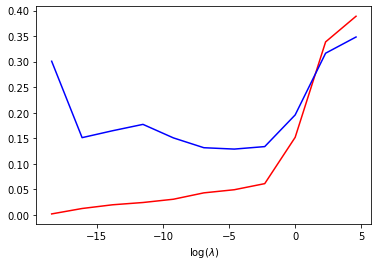

In [38]:
train_error = make_cost(0,xs,ys)
test_error = make_cost(0,testxs,testys)
lmds = [10**i for i in range(-8,3)]
eins=[]
eouts=[]
for lmd in lmds:
    train_cost = make_cost(lmd,xs,ys)
    w = minimize(train_cost,[0]*12).x
    eins.append(train_error(w))
    eouts.append(test_error(w))
plt.plot(np.log(lmds),eins,'-r')
plt.plot(np.log(lmds),eouts,'-b')
plt.xlabel('log($\lambda$)')

# Model Selection

1) Why don't  we just use every single data to train?

In [ ]:
#can't do model selection without the bias

2) What is validation data set for?

In [ ]:
#selecting the model

3) Why can't use validation set to report the expected out of sample performance?

In [ ]:
#noisy performance + argmin = bias

4) What is test data set for?

In [ ]:
#finding the expected performance

5) What's wrong if we use too much data set for validation and test sample?

In [ ]:
#nothing left to train on

6) Sketch by hand $E_{in}$ and $E_{out}$ vs $\lambda$. Then, Try plotting $\log(1/\lambda)$ vs Ein and Eout. 

# Cross-Validation

1) What was the problem with using 1 validation data set?

In [ ]:
#noisy

2) How does cross validation solves it?

In [ ]:
#generating a bunch of data set

3) In what kind of situation radomized stratification is a bad idea?

In [ ]:
#bad if we want to extrapolate it
#if we want to extrapolate then make sure 

4) If we want to report our $E_{out, expected} = x \pm \delta x$, how should we get $x$ and $\delta x$

In [ ]:
#xmean
#delta std dev

5) Try find that number for $\lambda = 0.01$

In [45]:
all_xs = np.concatenate([xs,testxs])
all_ys = np.concatenate([ys,testys])
def gen_sample(train_prob = 0.7):
    mask = np.random.random(len(all_xs))
    train_mask = mask < train_prob
    test_mask = ~train_mask
    train_xs = all_xs[train_mask]
    train_ys = all_ys[train_mask]
    valid_xs = all_xs[test_mask]
    valid_ys = all_ys[test_mask]
    return train_xs,train_ys,valid_xs,valid_ys
evalids=[]
for i in range(100):
    train_xs,train_ys,valid_xs,valid_ys = gen_sample()
    training_cost = make_cost(0.01,train_xs,train_ys)
    w = minimize(training_cost,[0.]*12).x
    validation_error = make_cost(0,valid_xs,valid_ys)
    evalids.append(validation_error(w))
print(np.mean(evalids),np.std(evalids))

0.09941219654211426 0.012067617041227425


(array([ 5., 10.,  7., 20., 14., 20., 11.,  6.,  4.,  3.]),
 array([0.07539942, 0.08068624, 0.08597305, 0.09125986, 0.09654668,
        0.10183349, 0.1071203 , 0.11240712, 0.11769393, 0.12298074,
        0.12826756]),
 <a list of 10 Patch objects>)

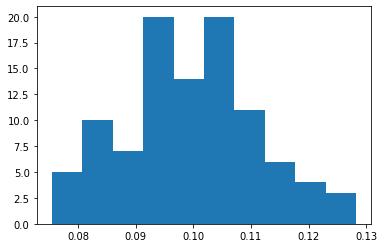

In [46]:
plt.hist(evalids, bins=10)

6) What happen to the test set? Do we still need it?

In [ ]:
#controversial
#ideally we need another test set
#practically we don't need one <-- most of the time

7) Summarize the steps we should to to obtain, evaluate and ship the model.

In [ ]:
#test/validation/test
#try many model
#pick the best one base 

# Logistic regression revisited

(if we have time if not it's your hw)

Combine what we just learned so far and build a classifier for this data

[[ 1.          2.36204925  1.40428222]
 [ 1.          2.49152252  3.72129074]
 [ 1.          2.8834858   2.17394498]
 ...
 [-1.          2.98666569  7.11268069]
 [-1.         -1.01092494  6.12838072]
 [-1.          4.84169114  6.16598692]]


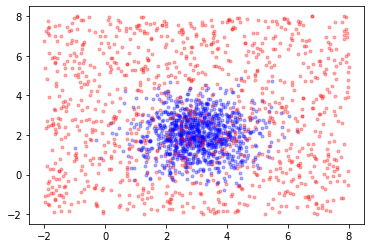

In [57]:

class1 = np.zeros((1000,3))
class1[:, 0] = 1.
class1[:, 1] = np.random.randn(1000)+3
class1[:, 2] = np.random.randn(1000)+2

class2 = np.zeros((1000,3))
class2[:, 0] = -1
class2[:, 1] = np.random.random(1000)*10-2
class2[:, 2] = np.random.random(1000)*10-2

data = np.concatenate([class1, class2])

class1idx = data[:,0] == 1

class2idx = data[:,0] == -1

plt.plot(data[class1idx, 1], data[class1idx, 2], '.b', alpha=0.3)
plt.plot(data[class2idx, 1], data[class2idx, 2], '.r', alpha=0.3)
print (data)

In [58]:
xclasses = data[:,0]
xclasses

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [64]:
padded_data=[]
for row in data:
    x = row[1]
    y = row[2]
    data_row=[1,x,y,x*y,x**2,y**2,x**2*y,x*y**2,x**3,y**3]
    padded_data.append(data_row)
padded_data = np.array(padded_data)
len(padded_data[0])

10

In [68]:
def make_cost(lmd,xs,ys):
    def cost(w):
        w = np.array(w)
        zs = expit(np.dot(xs,w))
        return -np.sum(np.log(expit(ys*zs))) + lmd*np.sum(w[1:]**2)
    return cost
training_cost = make_cost(0.1,padded_data,xclasses)

In [69]:
w = minimize(training_cost, [0.]*10).x

NameError: name 'expit' is not defined

In [70]:
def make_predictor(w):
    def predict(xs):
        return expit(np.dot(xs,w))
    return predict

In [71]:
plt.hist(make_predictor(w)(padded_data))

NameError: name 'expit' is not defined

In [72]:
from dataclasses import dataclass
@dataclass
Class Data:
    xs:np.ndarray
    ys:np.ndarray
def seperate(xs,ys,train_percent=0.7,valid_percent=0.2):
    mask = np.random.random(train_percent)
    train_mask = mask < train_percent
    valid_mask = (~train_mask) & (mask < train_percent+valid_percent)
    test_mask = (~train_mask) & (~valid_mask)
    train_data = Data(xs[train_mask],ys[train_mask])
    valid_data = Data(xs[valid_mask],ys[valid_mask])
    test_data = Data(xs[test_mask],ys[test_mask])
    return train_data,valid_data,test_data
